# Solving the python challenge

The http://www.pythonchallenge.com/ is like a detective game where you have to guess the URLs to keep progressing at the game. I will try to solve this challenge just for fun and write about it along the way. Although there are a thounsand ways to bake a cake, I will try to make the solutions straightforward and contained within this file. 

## The first challenge

The first challenge, http://www.pythonchallenge.com/pc/def/0.html, gives the hint that _"you should try changing the url"_. It is funny trying to guess replacing the 0, with 1, 238, 2**38, the correct answer is the result of the expresion

In [73]:
2**38

274877906944

By changing the url and putting the answer above http://www.pythonchallenge.com/pc/def/274877906944.html we get redirected to http://www.pythonchallenge.com/pc/def/map.html

## Second challenge
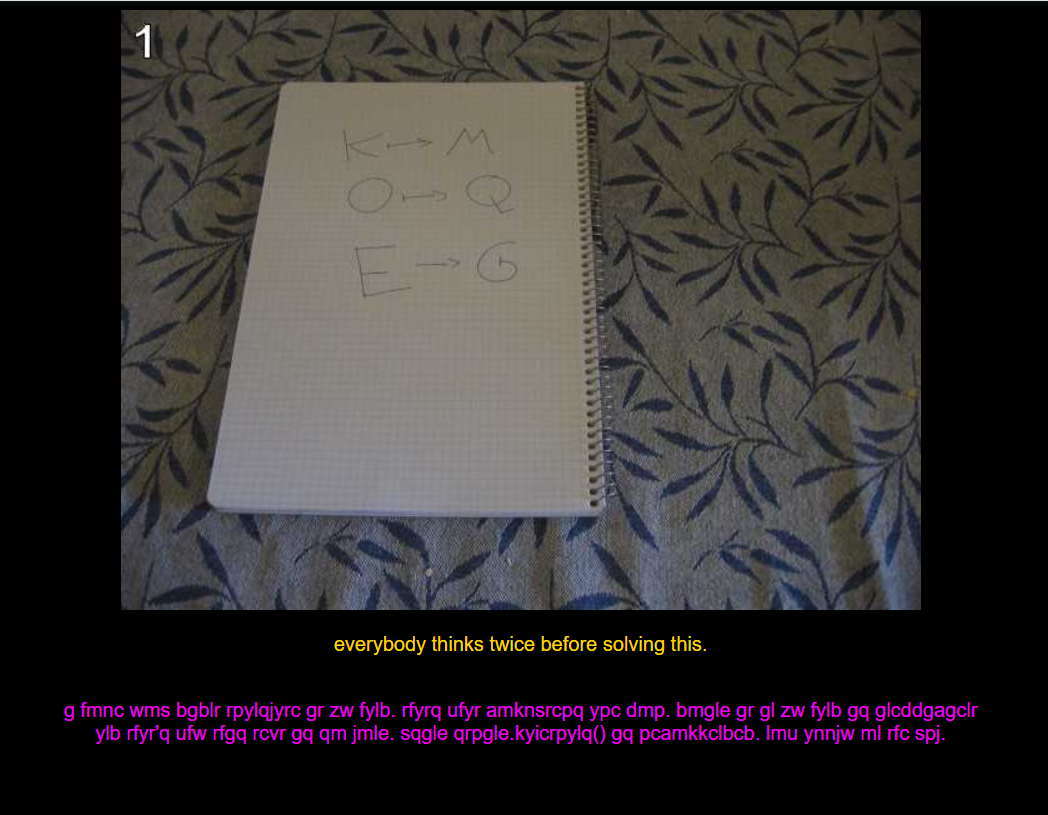
Now we have a ceasar cypher to solve. 

In [74]:
from string import ascii_lowercase
alph_size: int = len(ascii_lowercase)
text: str = "g fmnc wms bgblr rpylqjyrc gr zw fylb. rfyrq ufyr amknsrcpq ypc dmp. bmgle gr gl zw fylb gq glcddgagclr ylb rfyr'q ufw rfgq rcvr gq qm jmle. sqgle qrpgle.kyicrpylq() gq pcamkkclbcb. lmu ynnjw ml rfc spj."
shift: int = 2

def cc_decode(text:str, shift: int) -> str:
    return "".join(
        text[i] if text[i] not in ascii_lowercase else ascii_lowercase[(ascii_lowercase.find(text[i]) + shift)%alph_size]
        for i in range(len(text))
    )

def cc_encode(text:str, shift: int) -> str:
    return cc_decode(text, -1 * shift)

cc_decode(cc_encode(cc_decode(text, shift), shift), shift)

"i hope you didnt translate it by hand. thats what computers are for. doing it in by hand is inefficient and that's why this text is so long. using string.maketrans() is recommended. now apply on the url."

Applying it on the url, we have. 

In [75]:
cc_decode("map", shift)

'ocr'

and http://www.pythonchallenge.com/pc/def/ocr.html is it, the next challenge. 

## Third Challenge
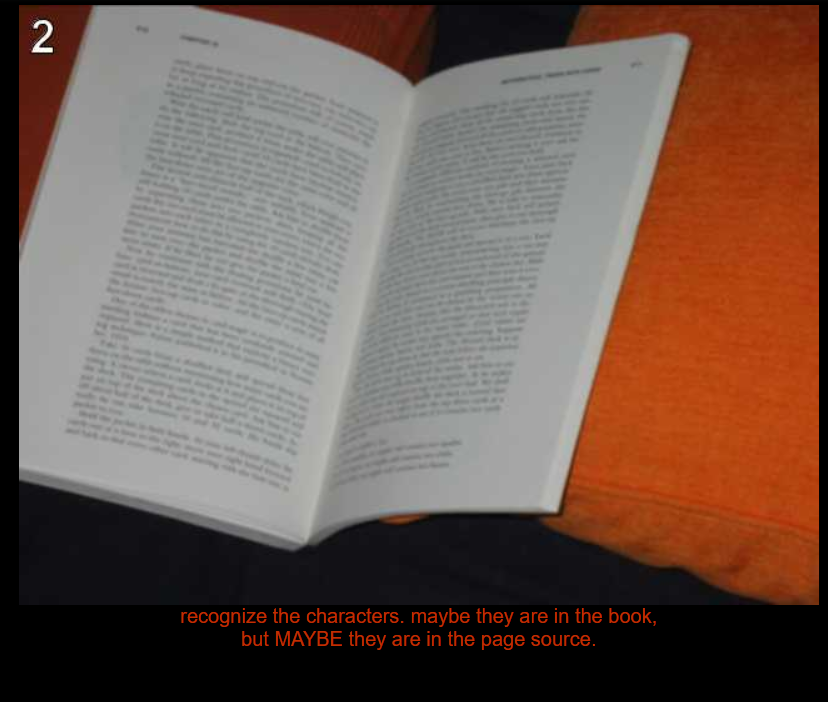

Now things start getting more interesting and intriguing, if you ```Ctrl + u``` you will see that there is a comment saying "find rare characters in the mess below:"


In [76]:
from collections import Counter

with open('files/third_challenge.txt', 'r') as file:
    text = file.read()

c = Counter(text)
"Concatenating the characters that only showed up once"
print(''.join(tpl[0] for tpl in filter(lambda tpl: tpl[1] == 1, c.most_common())))
print(c.most_common())


equality
[(')', 6186), ('@', 6157), ('(', 6154), (']', 6152), ('#', 6115), ('_', 6112), ('[', 6108), ('}', 6105), ('%', 6104), ('!', 6079), ('+', 6066), ('$', 6046), ('{', 6046), ('&', 6043), ('*', 6034), ('^', 6030), ('\n', 1219), ('e', 1), ('q', 1), ('u', 1), ('a', 1), ('l', 1), ('i', 1), ('t', 1), ('y', 1)]


## Fourth Challenge 
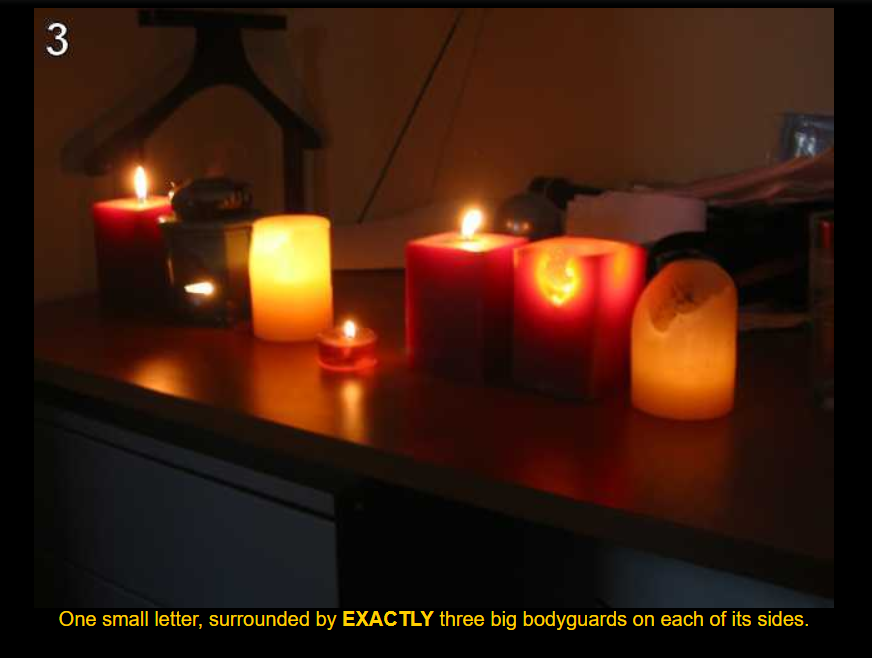
http://www.pythonchallenge.com/pc/def/equality.html, now the challenge seems to be getting harder, even copying and pasting that much text by hand doesnt seem feasible anymore. Lets see if we can fetch the page source from the code. 

In [77]:
import requests
url = "http://www.pythonchallenge.com/pc/def/equality.html"

resp = requests.get(url)
print(resp.content)

b'<html>\n<head>\n  <title>re</title>\n  <link rel="stylesheet" type="text/css" href="../style.css">\n</head>\n<body>\n<center>\n<img src="bodyguard.jpg"/><br>\n<font color="#ffd000">\nOne small letter, surrounded by <b>EXACTLY</b> three big bodyguards on \neach of its sides.\n</center>\n<br><br>\nTo see the solutions to the previous level, replace pc with pcc, i.e. go\nto: http://www.pythonchallenge.com/pcc/def/equality.html\n\n<br><br>\nJoin us on IRC: irc.freenode.net #pythonchallenge\n</body>\n</html>\n<!--\nkAewtloYgcFQaJNhHVGxXDiQmzjfcpYbzxlWrVcqsmUbCunkfxZWDZjUZMiGqhRRiUvGmYmvnJIHEmbT\nMUKLECKdCthezSYBpIElRnZugFAxDRtQPpyeCBgBfaRVvvguRXLvkAdLOeCKxsDUvBBCwdpMMWmuELeG\nENihrpCLhujoBqPRDPvfzcwadMMMbkmkzCCzoTPfbRlzBqMblmxTxNniNoCufprWXxgHZpldkoLCrHJq\nvYuyJFCZtqXLhWiYzOXeglkzhVJIWmeUySGuFVmLTCyMshQtvZpPwuIbOHNoBauwvuJYCmqznOBgByPw\nTDQheAbsaMLjTmAOKmNsLziVMenFxQdATQIjItwtyCHyeMwQTNxbbLXWZnGmDqHhXnLHfEyvzxMhSXzd\nBEBaxeaPgQPttvqRvxHPEOUtIsttPDeeuGFgmDkKQcEYjuSuiGROGfYpzkQgvcCDBKrcYwHF

In [78]:
# We got it, so lets treat it. we know what we want is between html comments. lets see... 
# Back in the day, >13+ years ago it helped learn regex. :')
import re
html = str(resp.content)
html = html.replace("\\n", "")

pattern = re.compile(r"<\!--(.*)-->")
groups = pattern.findall(html)
comment = groups[0]

# now we need to find the small letter surrounded by EXACTLY! three body guards in each side. 
pattern = re.compile(r"[^A-Z][A-Z]{3}([a-z])[A-Z]{3}[^A-Z]")
print("".join(pattern.findall(comment)))

linkedlist


## Fifth Challenge
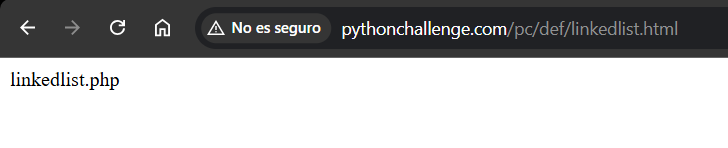
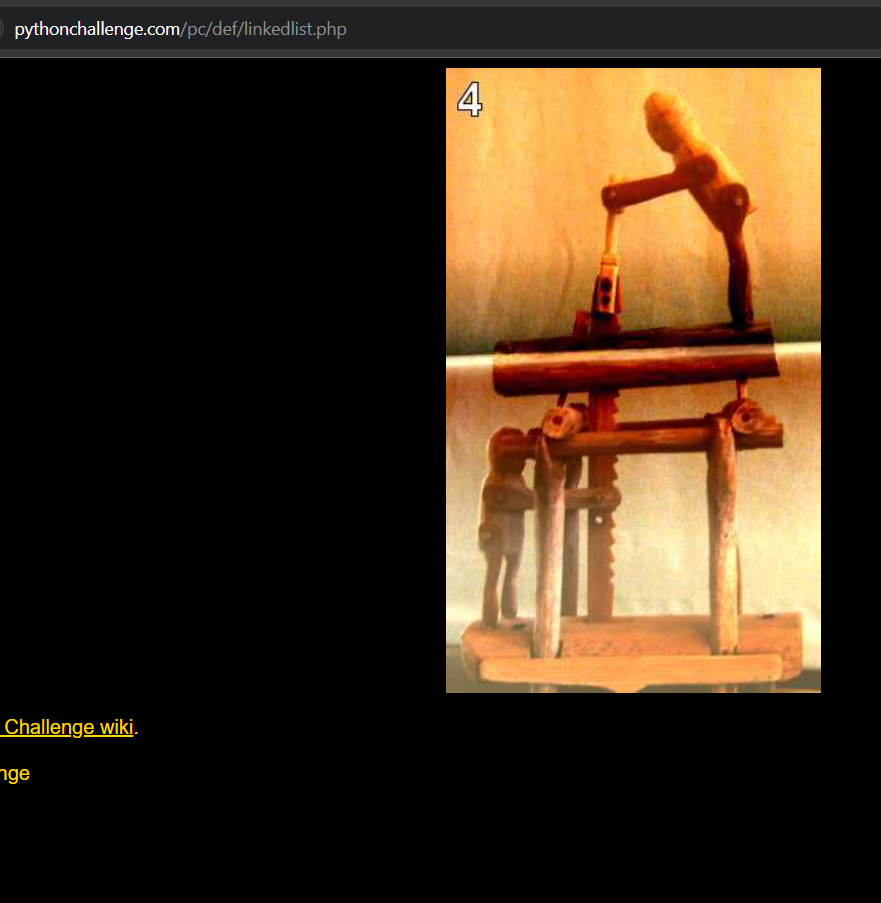
Linked list, huh? 

In the source code of the page we see the hint
> <a href="linkedlist.php?nothing=12345"><img src="chainsaw.jpg" border="0"/></a>

In [79]:
import requests, re
url = "http://www.pythonchallenge.com/pc/def/linkedlist.php?nothing="
def get_html_content(url: str) -> str:
    with requests.session() as session:
        return session.get(url).content
cur_nothing = 12345
get_html_content(url + str(cur_nothing))

b'and the next nothing is 44827'

In [80]:
# Guess we can see where it goes...
loop_limit = 400 
ptrn_numbers = re.compile(r"\d+")
nothing = 44827 
good_responses = []
for _ in range(loop_limit):
    resp = str(get_html_content(url + str(nothing)))
    numbers = ptrn_numbers.findall(resp)
    try:
        nothing = numbers[0]
        good_responses.append(resp)
    except:
        print(good_responses[-20:])
        print(resp)
        print(numbers)
        #raise Exception()

["b'and the next nothing is 14781'", "b'and the next nothing is 21412'", "b'and the next nothing is 55205'", "b'and the next nothing is 65516'", "b'and the next nothing is 53535'", "b'and the next nothing is 4437'", "b'and the next nothing is 43442'", "b'and the next nothing is 91308'", "b'and the next nothing is 1312'", "b'and the next nothing is 36268'", "b'and the next nothing is 34289'", "b'and the next nothing is 46384'", "b'and the next nothing is 18097'", "b'and the next nothing is 9401'", "b'and the next nothing is 54249'", "b'and the next nothing is 29247'", "b'and the next nothing is 13115'", "b'and the next nothing is 23053'", "b'and the next nothing is 3875'", "b'and the next nothing is 16044'"]
b'Yes. Divide by two and keep going.'
[]
["b'and the next nothing is 14781'", "b'and the next nothing is 21412'", "b'and the next nothing is 55205'", "b'and the next nothing is 65516'", "b'and the next nothing is 53535'", "b'and the next nothing is 4437'", "b'and the next nothing is

In [81]:
nothing = 2053//2
for i in range(400 - len(good_responses)):
    resp = str(get_html_content(url + str(nothing)))
    numbers = ptrn_numbers.findall(resp)
    try:
        nothing = numbers[0]
        good_responses.append(resp)
    except Exception as e:
        print(good_responses[-5:])
        print(resp)
        print(numbers)
        print("An error occurred :" + e)
    

In [82]:
def automate(nothing):
    for i in range(400 - len(good_responses)):
        resp = str(get_html_content(url + str(nothing)))
        numbers = ptrn_numbers.findall(resp)
        try:
            nothing = numbers[0]
            good_responses.append(resp)
        except Exception as e:
            print(good_responses[-5:])
            print(resp)
            print(numbers)
            print("An error occurred :" + e)
good_responses[-5:]

["b'and the next nothing is 22898'",
 "b'and the next nothing is 35431'",
 "b'and the next nothing is 71368'",
 "b'and the next nothing is 26500'",
 "b'and the next nothing is 6561'"]

In [83]:
automate(96460)
good_responses[-90:-60]

["b'and the next nothing is 58682'",
 "b'and the next nothing is 41683'",
 "b'and the next nothing is 80702'",
 "b'and the next nothing is 43114'",
 "b'and the next nothing is 59156'",
 "b'and the next nothing is 56688'",
 "b'and the next nothing is 47073'",
 "b'and the next nothing is 13724'",
 "b'and the next nothing is 41627'",
 "b'and the next nothing is 27826'",
 "b'and the next nothing is 36235'",
 "b'and the next nothing is 95912'",
 "b'and the next nothing is 93773'",
 "b'and the next nothing is 2403'",
 "b'and the next nothing is 95618'",
 "b'and the next nothing is 56738'",
 "b'and the next nothing is 37332'",
 "b'and the next nothing is 12426'",
 "b'and the next nothing is 77359'",
 "b'and the next nothing is 57230'",
 "b'and the next nothing is 4685'",
 "b'and the next nothing is 22380'",
 "b'and the next nothing is 4697'",
 "b'and the next nothing is 54282'",
 "b'and the next nothing is 43279'",
 "b'and the next nothing is 95470'",
 "b'and the next nothing is 62200'",
 "b'